In [6]:
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import chi2_contingency
from scipy import stats
import seaborn as sns

In [7]:
x=pd.read_csv('../XLable_onlyDiabeticRemoved.txt')
y=pd.read_csv('../TargetLable_onlyDiabeticRemoved.txt')

y=y[['Unnamed: 0','L104600']]

In [20]:
data= pd.read_csv('../sep19SexAndAgeAddedFINAL DATASET_ver2.txt',sep=',')
# data= pd.merge(x,y, how='inner',left_on='Unnamed: 0', right_on='Unnamed: 0')
 
#combine FIELD_6 and FIELD_7 both represent the same thing (Women's marital status)
data['max']=np.min(data[['FIELD_6','FIELD_7']],axis=1)
data=data.drop(columns=['FIELD_6','FIELD_7','B_DAY'])
print(data.shape)

(535169, 404)


In [21]:
# filter the data set 
data=data[data.FIELD_16!=1] # exclude people who are diagnosed for (diabetes) 
data=data[data.FIELD_23!=1] # exclude people who are on medication for diabetes

data=data[data.FIELD_15!=1] # exclude people who are diagnosed for (high blood pressure)
data=data[data.FIELD_22!=1] # exclude people who are on medication for high blood pressure

data=data[data.FIELD_17!=1] # exclude people who are diagnosed for hyperlipidemia
data=data[data.FIELD_24!=1] # exclude people who are on medication for hyperlipidemia

print(data.shape)

(466680, 404)


In [22]:
#split column types to categorical and numerical
numerical_cols = list(data.columns[~data.columns.str.startswith('FIELD')])
categorical_cols = list(data.columns[data.columns.str.startswith('FIELD')])

Calculate correlation Value - for numerical values
========

In [24]:
corr=data[numerical_cols].corr()
corr=corr.L104600
corrvalPD=pd.DataFrame()
corrvalPD['Col']=corr.index
corrvalPD['val']=abs(corr.values)

corrvalPD=corrvalPD.sort_values(by='val',ascending=False)
corrvalPD.head()

,Col,val
131,L382900,1.0
40,L104600,1.0
119,L305900,1.0
59,L117700,1.0
60,L120100,1.0


In [25]:
#count of none NA values of feature set
mydataset=data.copy()[numerical_cols]
colCount=[]
for i in mydataset.columns:
    colCount.append([i,mydataset[i].dropna().shape[0]])

colCountPD=pd.DataFrame(colCount,columns=['Col','Count'])
colCountPD.head()

,Col,Count
0,Unnamed: 0,466680
1,COMPARE,466680
2,AGE,466679
3,SEX,466679
4,L100100,446887


In [26]:
mergedColCorrCount=pd.merge(corrvalPD,colCountPD,how='inner',left_on='Col',right_on='Col')
mergedColCorrCount=mergedColCorrCount[mergedColCorrCount.Count>50000]
mergedColCorrCount=mergedColCorrCount.sort_values(by='val', ascending=False)
mergedColCorrCount.head(20)

,Col,val,Count
1,L104600,1.000000,161194
8,L100800,0.671399,466134
16,L103300,0.267091,397549
17,max,0.256458,204407
20,AGE,0.242576,466679
22,L103000,0.236908,465103
23,S000300,0.235990,465393
26,L102900,0.196673,465273
28,L101600,0.169049,452094
30,S000501,0.166674,466410


In [27]:
print(list(mergedColCorrCount.head(20).Col))

['L104600', 'L100800', 'L103300', 'max', 'AGE', 'L103000', 'S000300', 'L102900', 'L101600', 'S000501', 'L103200', 'L103100', 'L101700', 'L101300', 'S000502', 'L190000', 'L102000', 'L190300', 'L504700', 'L101100']


Anova test - For categorical values [Questionnaire answers]
=======

In [33]:
mydataset=data.copy()[categorical_cols] #[np.insert(categorical_cols,0,'L100800')]


mydataset=mydataset.drop(columns=['FIELD_1','FIELD_2','FIELD_8','FIELD_10','FIELD_11','FIELD_12','FIELD_39','FIELD_88',
                                    'FIELD_89','FIELD_109','FIELD_110','FIELD_111','FIELD_70','FIELD_82','FIELD_85','FIELD_91',
                                    'FIELD_103','FIELD_106',
                                    'FIELD_64','FIELD_65','FIELD_66','FIELD_67','FIELD_68','FIELD_69','FIELD_70','FIELD_72',
                                    'FIELD_73','FIELD_74','FIELD_75','FIELD_76','FIELD_77','FIELD_80','FIELD_81','FIELD_84',
                                    'FIELD_85','FIELD_87','FIELD_90','FIELD_93','FIELD_94','FIELD_95','FIELD_96','FIELD_97',
                                    'FIELD_98','FIELD_101','FIELD_102','FIELD_105','FIELD_108','FIELD_112','FIELD_113',
                                    'FIELD_114','FIELD_115','FIELD_116','FIELD_117','FIELD_118','FIELD_119','FIELD_120',
                                    'FIELD_121','FIELD_122','FIELD_123','FIELD_124','FIELD_125','FIELD_126','FIELD_127',
                                    'FIELD_128','FIELD_129','FIELD_130','FIELD_131','FIELD_132','FIELD_133','FIELD_134',
                                    'FIELD_135','FIELD_136','FIELD_137','FIELD_138','FIELD_139','FIELD_140'
                                 ])

mydataset=mydataset.drop(mydataset[mydataset.FIELD_3=='`'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_3=='G'].index)


mydataset=mydataset.drop(mydataset[mydataset.FIELD_4=='.'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_5=='.'].index)

mydataset=mydataset.drop(mydataset[mydataset.FIELD_35=='?'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_35=='.'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_36=='.'].index)
mydataset=mydataset.drop(mydataset[mydataset.FIELD_37=='\\'].index)
 
# mydataset=mydataset.drop(mydataset[mydataset.FIELD_39 == '7+' ].index)
# mydataset=mydataset.drop(mydataset[mydataset.FIELD_39 == '5~7'].index)
# mydataset=mydataset.drop(mydataset[mydataset.FIELD_39 == '3-4'].index)


# mydataset=mydataset.drop(mydataset[mydataset.FIELD_95=='.'].index)

In [34]:
colslist=mydataset.columns
DiabeticColVals=data.L104600

cor=[]
pval=[]
count=[]

for i in range(len(colslist)):
    print(i,colslist[i])
    
    temp=pd.DataFrame([])
    temp['a']=DiabeticColVals
    temp['b']=mydataset[colslist[i]].astype(float)
    temp=temp.dropna()
    count.append(temp.shape[0])
    
    uniquevalues=temp.b.unique()
    
    selectedGroupVals=[]
    for k in range(len(uniquevalues)):
        selectedGroupVals.append(np.asarray(temp[temp['b']==uniquevalues[k]].a))

    F, p = stats.f_oneway(*selectedGroupVals)
    cor.append(F)
    pval.append(p)
    

0 FIELD_3
1 FIELD_4
2 FIELD_5
3 FIELD_9
4 FIELD_13
5 FIELD_14
6 FIELD_15
7 FIELD_16
8 FIELD_17
9 FIELD_18
10 FIELD_19
11 FIELD_20
12 FIELD_21
13 FIELD_22
14 FIELD_23
15 FIELD_24
16 FIELD_25
17 FIELD_26
18 FIELD_27
19 FIELD_28
20 FIELD_29
21 FIELD_30
22 FIELD_31
23 FIELD_32
24 FIELD_33
25 FIELD_34
26 FIELD_35
27 FIELD_36
28 FIELD_37
29 FIELD_38
30 FIELD_40
31 FIELD_41
32 FIELD_42
33 FIELD_43
34 FIELD_44
35 FIELD_45
36 FIELD_46
37 FIELD_47
38 FIELD_48
39 FIELD_49
40 FIELD_50
41 FIELD_51
42 FIELD_52
43 FIELD_53
44 FIELD_54
45 FIELD_55
46 FIELD_56
47 FIELD_57
48 FIELD_58
49 FIELD_59
50 FIELD_60
51 FIELD_61
52 FIELD_62
53 FIELD_63


In [35]:
FvalPvalCorr=pd.DataFrame()    
FvalPvalCorr['Cols']=colslist
FvalPvalCorr['F']=cor
FvalPvalCorr['P']=pval
FvalPvalCorr['Count']=count
FvalPvalCorr=FvalPvalCorr.sort_values(by='F', ascending=False)


In [36]:
FvalPvalCorr[FvalPvalCorr.Count>50000].head(10)

,Cols,F,P,Count
22,FIELD_31,601.135929,1.668798e-132,159832
24,FIELD_33,297.654705,3.110642e-318,160564
12,FIELD_21,144.909915,2.323962e-33,158504
18,FIELD_27,80.463878,1.181897e-35,159679
5,FIELD_14,63.271839,3.405682e-28,160688
19,FIELD_28,17.713902,2.568836e-05,159596
2,FIELD_5,16.718443,2.256394e-19,53897
29,FIELD_38,12.015843,2.672690e-17,148708
1,FIELD_4,10.831715,9.841347e-14,158257
9,FIELD_18,10.455934,1.222808e-03,160600


In [37]:
print(list(FvalPvalCorr[FvalPvalCorr.Count>50000].Cols)[:10])

['FIELD_31', 'FIELD_33', 'FIELD_21', 'FIELD_27', 'FIELD_14', 'FIELD_28', 'FIELD_5', 'FIELD_38', 'FIELD_4', 'FIELD_18']


================== Check Variance inflation factor and multi collinearity
==================== 

In [54]:
# temppd=pd.DataFrame(data[['L100800', 'L103300', 'max', 'AGE', 'L103000', 'S000300', 'L102900', 'L101600', 
#                            'S000501', 'L103200', 'L103100', 'L101700', 'L101300', 'S000502', 'L190000', 'L102000', 
#                            'L190300', 'L504700', 'L101100','FIELD_31', 'FIELD_33', 'FIELD_21', 'FIELD_27', 
#                            'FIELD_14', 'FIELD_28', 'FIELD_5', 'FIELD_38', 'FIELD_4', 'FIELD_18'
#                           ]]).dropna()  
# temppd['y']=data.L104600
 

# corr = (temppd.corr())
# sns.heatmap(corr, vmin=-1, vmax=1) 

# corr.head(20)

In [56]:

# def vifcal(inputdata,depcol):
#     vifL5=[]
#     import statsmodels.formula.api as sm
#     xvars=inputdata.drop([depcol],axis=1)
#     xvarnames=xvars.columns
#     for i in range(0,xvarnames.shape[0]):
#         _y=xvars[xvarnames[i]]
#         _x=xvars[xvarnames.drop(xvarnames[i])]
#         rsq=sm.ols(formula="_y~_x",data=xvars).fit().rsquared
#         vif=round(1/(1-rsq),2)
#         print(i,', ',xvarnames[i]," VIF = ",vif)
#         if(vif<5):
#             vifL5.append(xvarnames[i])
#     return vifL5
    
    
# newcols = vifcal(temppd,'y')

In [ ]:
print(newcols,len(newcols))

========================= LASSO method
================

In [57]:
selectedcols=['L104600', 'L100800', 'L103300', 'max', 'AGE', 'L103000', 'S000300', 'L102900', 'L101600', 
                'S000501', 'L103200', 'L103100', 'L101700', 'L101300', 'S000502', 'L190000', 'L102000', 
                'L190300', 'L504700', 'L101100','FIELD_31', 'FIELD_33', 'FIELD_21', 'FIELD_27', 
                'FIELD_14', 'FIELD_28', 'FIELD_5', 'FIELD_38', 'FIELD_4', 'FIELD_18'
             ]
data2=data[selectedcols].copy().dropna()
print(data2.shape)

(2436, 30)


In [58]:
x=data2[['L100800', 'L103300', 'max', 'AGE', 'L103000', 'S000300', 'L102900', 'L101600', 
                'S000501', 'L103200', 'L103100', 'L101700', 'L101300', 'S000502', 'L190000', 'L102000', 
                'L190300', 'L504700', 'L101100','FIELD_31', 'FIELD_33', 'FIELD_21', 'FIELD_27', 
                'FIELD_14', 'FIELD_28', 'FIELD_5', 'FIELD_38', 'FIELD_4', 'FIELD_18'
        ]]
y=data2.L104600

In [59]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)
clf.fit(x,y)

print(clf.coef_)

print(clf.intercept_)  

# pd.DataFrame([x.columns.ravel(),clf.coef_.ravel()],columns=['Name','coeff'])

lassod=pd.DataFrame()
lassod['Name']=x.columns
lassod['coeff']=clf.coef_
lassod

lassod=lassod.drop(lassod[lassod.coeff==0].index)
lassod.coeff=abs(lassod.coeff)
lassod=lassod.sort_values(by='coeff', ascending=False)
lassod

[ 1.76095874e-02  0.00000000e+00  0.00000000e+00  3.72825887e-03
  2.69285310e-05  0.00000000e+00  0.00000000e+00  1.07082172e-03
 -0.00000000e+00  1.10108300e-03 -1.22109274e-03  0.00000000e+00
  8.67466852e-04 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00]
3.5521596610476305


,Name,coeff
0,L100800,0.017610
3,AGE,0.003728
10,L103100,0.001221
9,L103200,0.001101
7,L101600,0.001071
12,L101300,0.000867
4,L103000,0.000027


In [60]:
print(list(lassod.Name[:16]))

['L100800', 'AGE', 'L103100', 'L103200', 'L101600', 'L101300', 'L103000']


=============================== SelectKBest method
========================

In [61]:
# from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(x,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

# x=x[x.columns[:15]]
print(list(x.columns[:16]))

['L100800', 'L103300', 'max', 'AGE', 'L103000', 'S000300', 'L102900', 'L101600', 'S000501', 'L103200', 'L103100', 'L101700', 'L101300', 'S000502', 'L190000', 'L102000']


========================================= LinearSVC
===============

In [ ]:
# from sklearn.svm import LinearSVC
# from sklearn.datasets import load_iris
# from sklearn.feature_selection import SelectFromModel

# lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(x, y)
# model = SelectFromModel(lsvc, prefit=True)
# X_new = model.transform(x)
# X_new.shape

In [ ]:
# x.dtypes

================================ SequentialFeatureSelector 
================================

In [ ]:
# from sklearn.linear_model import LinearRegression
# from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
# from sklearn.ensemble import RandomForestRegressor

# lr = RandomForestRegressor()

# sfs = SFS(lr, 
#           k_features=13, 
#           forward=True, 
#           floating=False, 
#           scoring='neg_mean_squared_error',
#           cv=5)

# sfs = sfs.fit(x, y)
# fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

# plt.title('Sequential Forward Selection (w. StdErr)')
# plt.grid()
# plt.show()

================================= feature_importances
=====

[4.28389208e-01 2.83021613e-02 1.92208222e-02 3.80858285e-02
 2.43882840e-02 2.69541329e-02 1.68570813e-02 2.53097455e-02
 2.62953126e-02 2.13537959e-02 2.35145039e-02 2.72489861e-02
 2.56270482e-02 1.85567989e-02 3.71380973e-02 2.38745674e-02
 2.47672946e-02 4.02196751e-02 2.71502844e-02 1.18841323e-02
 7.44362719e-03 3.93254719e-05 6.18905479e-03 7.07265798e-04
 6.03518660e-03 1.87074776e-02 2.21437184e-02 1.82836829e-02
 5.31290101e-03]


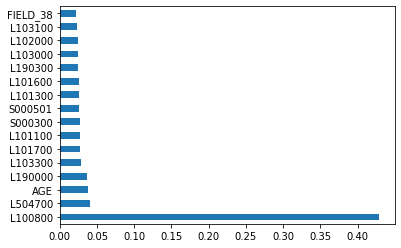

Index(['L100800', 'L504700', 'AGE', 'L190000', 'L103300', 'L101700', 'L101100',
       'S000300', 'S000501', 'L101300', 'L101600', 'L190300', 'L103000',
       'L102000', 'L103100', 'FIELD_38'],
      dtype='object')


In [62]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y)

print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(16).plot(kind='barh')
plt.show()

print(feat_importances.nlargest(16).index)

============================= Backward Elimination
========

In [ ]:
import statsmodels.regression.linear_model as sm
temp=x.copy()
temp['const']=np.ones((x.shape[0],1))
regressor_OLS = sm.OLS(endog = y, exog = temp).fit()
regressor_OLS.summary()

In [ ]:
# temp=temp.drop(columns=['L103100', 'S000300','L190400','L102900','L101300','S000501','S000502','L100500','FIELD_40',
#                         'FIELD_41','FIELD_29','FIELD_18','FIELD_31','FIELD_27','FIELD_25','SEX'])
# regressor_OLS = sm.OLS(endog = y, exog = temp).fit()
# regressor_OLS.summary()

In [ ]:
# temp=temp.drop(columns=['FIELD_33'])
# regressor_OLS = sm.OLS(endog = y, exog = temp).fit()
# regressor_OLS.summary()

In [ ]:
print(temp.columns.shape)
temp.columns